In [1]:
import maze_l1 as mz
import numpy as np
import importlib
importlib.reload(mz)

<module 'maze_l1' from 'g:\\Min enhet\\Plugg\\INDEK\\E\\EL\\EL2805 Reinforcement Learning\\Labs\\Github\\Lab-1-Reinforcement-Learning\\maze_l1.py'>

## 1a) MDP formulation

#### State space $\mathcal{S}$
Within this model there are two objects that are continuously moving. Namely the player and the minotaur. The player can move in any direction (up, down, left, right) or stay in the same position. The minotaur can move in any direction (up, down, left, right). The state space is the set of all possible positions of the player and the minotaur in the maze. Moreover if the player is caught then it is impossible to get any future rewards, or move out of the current position

$$\mathcal{S} = \big\lbrace ((i,j), (k,l)):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle or (k, l) and (k,l) is not a boundary} \big\rbrace | caught.$$

#### Action space $\mathcal{A}$
We cannot control the minotaur, but we can control the player. Therefore we have five options: move `left`, `right`, `down`, `up` and `stay`. Just like lab0 we allow the player to move in all directions, and move into a "wall", but the state will not change and the reward will be a large negative number to prevent this from happening. 

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition probabilities $\mathcal{P}$

- At a state (or position) $s$ taking any action will always lead to a different state (position or caught) $s'$, then $\mathbb{P}(s' \vert s, a) = \frac{1}{m}$. This is due to the minotaur always being able to move and it not going into the walls. Note that it depends on the amount of possible moves for the minotaur, called $m$. If the player is caught then it will always go to the caught state $caught$, then $\mathbb{P}(s' \vert caught

, a) = 1$.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles and the minotaur.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to the minotaur then $r(s,a) = -\infty$
   - If at state $caught$, taking anny action $a$ lead to $r(caught,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 


## Exercise 1b) difference when the player and the minotaur move asynchronously

#### State space $\mathcal{S}$
Within this model there are two objects that are continuously moving. namely the player and the minotaur. The player can move in any direction (up, down, left, right) or stay in the same position. The minotaur can move in any direction (up, down, left, right). Now the player and the minotaur move at alternating times. The state space is the set of all possible positions of the player and the minotaur in the maze.  There is also a state where the player is caught.

$$\mathcal{S} = \big\lbrace (i,j):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle nor the position of the minotaur }\big\rbrace | caught.$$

#### Action space $\mathcal{A}$
We cannot control the minotaur, but we can control the player. Therefore we have five options: move `left`, `right`, `down`, `up` and `stay`. Just like lab0 we allow the player to move in all directions, and move into a "wall", but the state will not change and the reward will be a large negative number to prevent this from happening. 

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition probabilities $\mathcal{P}$

- At a state (or position) $s$ taking any action will always lead to a different state (or position) $s'$, then $\mathbb{P}(s' \vert s, a) = 1$. As the player and the minotaur move alternatingly, we can only control the player movement. Therefore any transition to the next state has a probability of 1.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles and the minotaur.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to the minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to a place where the minotaur can move in one timestep then $r(s,a) = -\infty$
   - If the player is in state caught then $r(caught,a), then any action $a$ will lead to $r(caught, a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 


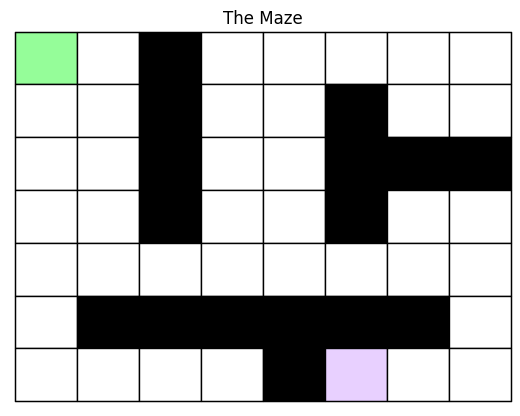

In [3]:
"""This is the maze, where the following numbers correspond to the following objects:
0 = empty cell      -> white
1 = obstacle        -> black
2 = end             -> light purple
3 = start           -> light green
4 = minotaur        -> light red
"""
import importlib
importlib.reload(mz)
maze = np.array([
    [3, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

env = mz.Maze(maze)

# Draw the maze
mz.draw_maze(maze)

In [23]:
# Finite horizon
horizon = 20

# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env, horizon)

In [ ]:
# Show the shortest path 
# importlib.reload(mz)

# mz.animate_solution(maze, path)

In [ ]:
# Simulate with a static minotaur 
importlib.reload(mz)

method = 'DynProg';
starting_position_minotaur = (3, 6)
path = env.simulate_solo(policy, method, starting_position_minotaur);

mz.animate_solution(maze, path)

In [ ]:
# Simulate with a moving minotaur (randomly)  
importlib.reload(mz)
path = env.simulate(policy, method)

mz.animate_solution(maze, path)

## 1d) Probability


Text(0, 0.5, 'Probability of exiting the maze')

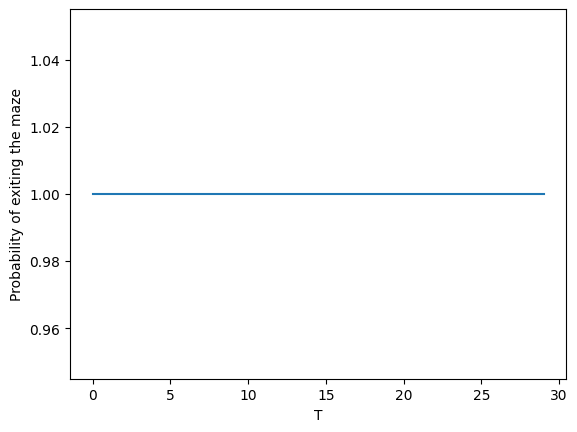

In [4]:
# Calculate the probability of reaching the exit starting from position A
importlib.reload(mz)

horizon = 30
maze2 = np.array([
    [3, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

env = mz.Maze(maze2, False)

# Get the policy
V, policy = mz.dynamic_programming(env, horizon)
prob_history = env.dynamic_programming_probability_exiting(horizon, policy)

# Make a plot from the probability history
import matplotlib.pyplot as plt
plt.plot(prob_history)
plt.xlabel('T')
plt.ylabel('Probability of exiting the maze')


## 1d with movement

In [4]:
# Look at the policy
V, policy = mz.dynamic_programming(env, horizon)

env.explain_policy(policy, (6, 5))

NameError: name 'horizon' is not defined

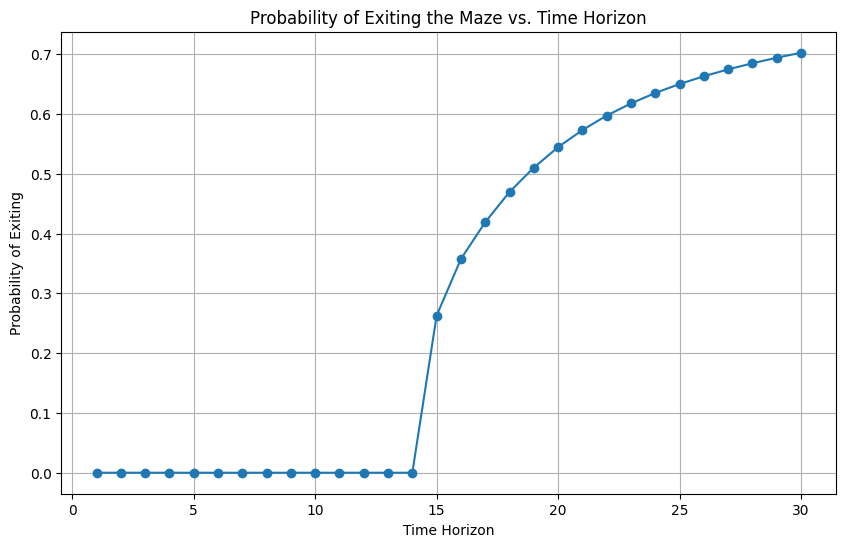

In [8]:
importlib.reload(mz)
env = mz.Maze(maze2, minotaur_stay_enabled = True)
    
time_horizons = range(1, 31)
exit_probabilities = []
for T in time_horizons:
    # Compute the optimal policy using dynamic programming\n",
    _, policy = mz.dynamic_programming(env, T)

    # Calculate the probability of exiting the maze\n",
    prob_exit = env.dynamic_programming_probability_exiting2(T, policy)
    exit_probabilities.append(prob_exit[-1])  # Last element is the probability at T
# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.plot(time_horizons, exit_probabilities, marker='o')
plt.xlabel('Time Horizon')
plt.ylabel('Probability of Exiting')
plt.title('Probability of Exiting the Maze vs. Time Horizon')
plt.grid(True)
plt.show()

In [ ]:
# Simuate a shortest path
importlib.reload(mz)
method = 'DynProg'
path = env.simulate(policy, method)

mz.animate_solution(maze, path)


## 1e - Value iteration

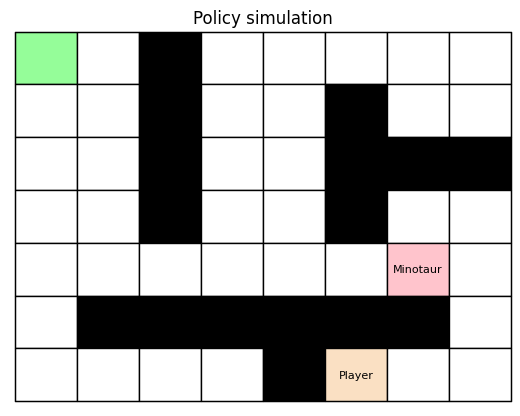

In [24]:
importlib.reload(mz)
env = mz.Maze(maze2, False)

# Discount Factor
gamma   = 0.50

# Accuracy treshold
epsilon = 0.001

# The max number of iterations to run the algorithm
max_iter = 30

V, policy = mz.value_iteration(env, gamma, epsilon, max_iter)
method = 'ValIter'

# Simulate with a static minotaur
path = env.simulate(policy, method)

#Show the shortest path 
mz.animate_solution(maze, path)

## 1f) Simulate 10000 games

In [25]:
importlib.reload(mz)
# Amount of exits
exit_n = 0
total_n = 0
ITERATION_COUNT = 10000

# Simulate with a moving minotaur (randomly)
for i in range(ITERATION_COUNT):
    # Simulate with a static minotaur
    path = env.simulate(policy, method)

    # If the path ends in the exit, increment the number of exits
    if path[-1][0] == (6,5):
        exit_n += 1

    # Increment the total number of iterations
    total_n += 1

493
824
1045
1367
1430
1484
1538
1592
484
495
824
1045
1374
1421
1484
1538
1594
1648
1702
1813
2198
2144
2089
493
815
491
822
1041
1372
1428
1475
1529
1583
1637
1700
1809
2194
2131
2077
484
822
1041
1370
1424
486
817
1036
1365
1421
1484
1540
1594
493
822
1043
1365
1419
1475
1522
1585
1639
1695
1805
2198
2135
2079
493
824
1043
1374
1421
1475
1522
1585
1633
1689
1798
477
806
1034
1363
1419
1475
1531
1594
1641
1704
1813
2200
2145
2083
486
815
1043
1372
1426
1473
1529
1583
1631
1693
1811
2196
2140
2086
493
822
1034
1356
1404
1458
1521
1575
1629
1683
1785
2171
2117
2063
484
806
1027
1356
1404
1451
493
824
1045
1367
1430
1477
1540
1594
1648
1695
1807
493
815
1034
1372
1428
1482
1536
1583
1646
1700
1803
2189
2135
2081
493
815
1043
1374
1430
1484
1538
1594
1641
1697
1815
2193
2145
2089
491
822
1041
1372
1428
1484
1538
1585
1639
1687
1805
2189
2126
2079
491
822
1041
1372
1426
1473
1527
1583
1631
1685
1787
2164
2110
2063
495
824
1043
1372
1419
1473
1527
1575
1622
1676
1785
2178
2131
2084
486
808

In [26]:
exit_n / total_n

print(exit_n)
print(exit_n/total_n)

6221
0.6221


1g)

What does it mean that a learning method is on-policy or off-policy?
On-Policy Learning:
On-policy learning methods learn the value of the policy being followed, meaning they evaluate or improve the policy that is used to make decisions. The key characteristic of on-policy methods is that they attempt to evaluate or improve the policy that dictates the agent's actions. An example of an on-policy algorithm is SARSA (State-Action-Reward-State-Action), where the learning process follows the policy the agent is actually executing, and updates are made based on the actions taken by the current policy.

Off-Policy Learning:
Off-policy methods learn the value of an optimal policy independently of the agent's actions. They evaluate or improve a policy different from the one used to generate the data. This means that the learning algorithm can learn from actions that are outside its current policy, such as from a fixed dataset of experiences, or from the actions chosen by a different policy. A quintessential example of an off-policy method is Q-learning, where the learning process updates its estimates based on the maximum reward of the next state, regardless of the action taken by the current policy.

State the convergence conditions for Q-learning and SARSA.

Q-learning is guaranteed to converge to the optimal action-value function Q*(s,a), provided the following conditions are met:
- The policy has a chance to visit all state-action pairs infinitely often. This is often ensured through adequate exploration, such as using an ε-greedy policy that has a non-zero probability of selecting any action.
- The learning rate α follows certain conditions, typically it must decrease over time and satisfy the criteria 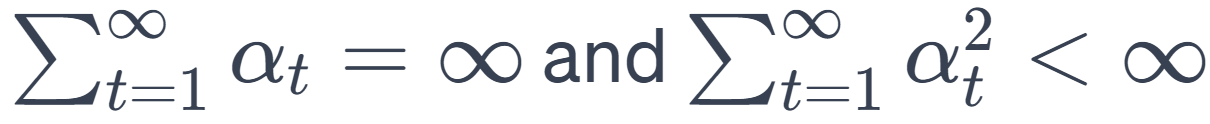 These conditions ensure that the learning rate is high enough to continue learning indefinitely but decays in such a way that the value function estimates eventually converge.
- The environment and the reward function must be stationary, meaning they do not change over time.

SARSA also converges to the optimal action-value function under similar conditions as Q-learning:

- All state-action pairs must be visited infinitely often, which is usually achieved through sufficient exploration (e.g., ε-greedy approach).
- The learning rate α must satisfy the same criteria as for Q-learning, ensuring it decays appropriately over time.
- The environment and reward function should be stationary.
- Additionally, the policy being followed must also converge to a policy that is greedy with respect to the Q-value estimates. This is because SARSA's updates depend on the policy followed (as it's an on-policy method), and for convergence, this policy must stabilize.



1h)

Altering the State Space:
Player's Health: Since the player's life is geometrically distributed with a mean of 50 moves, this suggests a probability of survival from one step to the next. We need to include the player's health as a state component, which decreases with each move.

Key Collection: The state must reflect whether the keys have been collected. This can be a binary part of the state (e.g., keys collected or not).

Adjusting the Transition Probabilities:
Player's Movement: The transition probabilities for the player's movement remain largely the same but should include the reduction of health with each move.
Minotaur's Movement: The Minotaur's movement probabilities are modified so that there's a 35% chance it moves toward the player and a 65% chance it moves randomly in any direction. This means that there is a 51.25% chance to move towards the player and a 16.25% chance to move in every other direction.

Modifying the Reward Structure:
Health Penalty: Introduce a penalty if the player's health reaches zero before exiting.
Key Collection Reward: Introduce a reward for collecting the keys, encouraging the policy to direct the player towards them.
No reward if exit is reached without the key. 